In [814]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

In [815]:
app_data=pd.read_csv('googleplaystore.csv')

In [816]:
app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [817]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [818]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [819]:
app_data=app_data.dropna()

In [820]:
app_data=app_data[app_data.Size!="Varies with device"]
app_data.reset_index(drop=True, inplace=True)

In [821]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   object 
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(1), object(12)
memory usage: 784.5+ KB


In [822]:
for i in range(7723):
    app_data.loc[i,'Installs']=app_data.loc[i,'Installs'].replace("+","")
    app_data.loc[i,'Installs']=int(app_data.loc[i,'Installs'].replace(",",""))
    app_data.loc[i,'Price']=float(app_data.loc[i,'Price'].replace("$",""))
    str=app_data.loc[i,'Size']
    char=str[len(str)-1]
    if char=="M":
        app_data.loc[i,'Size']=float(app_data.loc[i,'Size'].replace("M",""))*1000
    elif char=="k":
        app_data.loc[i,'Size']=float(app_data.loc[i,'Size'].replace("k",""))
        
app_data['Size']=app_data['Size'].astype(float)
app_data['Reviews']=app_data['Reviews'].astype(float)
app_data['Installs']=app_data['Installs'].astype(int)
app_data['Price']=app_data['Price'].astype(float)

In [823]:
app_data['Rating'].aggregate(['min','max'])


min    1.0
max    5.0
Name: Rating, dtype: float64

In [824]:
app_data[app_data['Reviews']>app_data['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1787,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4220,Ra Ga Ba,GAME,5.0,2.0,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
4776,Brick Breaker BR,GAME,5.0,7.0,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
5210,Trovami se ci riesci,GAME,5.0,11.0,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
6110,DN Blog,SOCIAL,5.0,20.0,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
7630,Mu.F.O.,GAME,5.0,2.0,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [825]:
app_data = app_data.drop(index=[1787,4220,4776,5210,6110,7630])

In [826]:
app_data.reset_index(drop=True, inplace=True)


In [827]:
for i in range(7717):
    if app_data.loc[i,'Type']=='Free'and app_data.loc[i,'Price']>0:
        print(i)

In [828]:
import matplotlib.pyplot as plt
from matplotlib import style

In [829]:
app_data['Price'].mean()

1.1287248930931604

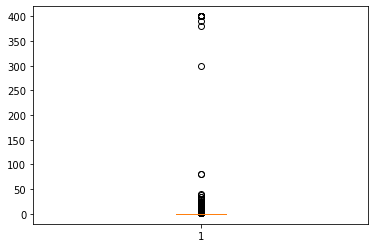

In [830]:
plt.boxplot(app_data['Price'])
plt.show()

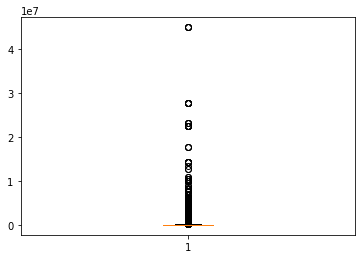

In [831]:
plt.boxplot(app_data['Reviews'])
plt.show()

<AxesSubplot:ylabel='Frequency'>

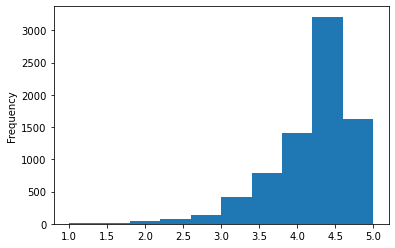

In [832]:
app_data['Rating'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

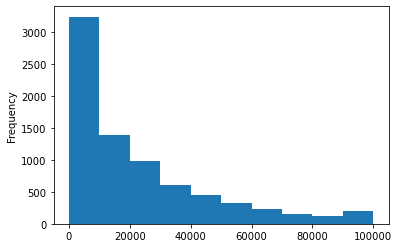

In [833]:
app_data['Size'].plot.hist()

In [834]:
for i in range(7717):
    if app_data.loc[i,'Price']>200:
        app_data = app_data.drop(index=[i])  
    elif app_data.loc[i,'Reviews']>200000:
         app_data=app_data.drop(index=[i])
    else:
        continue

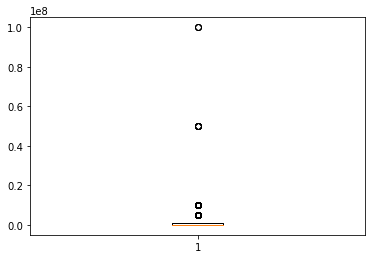

In [835]:
plt.boxplot(app_data['Installs'])
plt.show()

In [836]:
per=[10, 25, 50, 70, 90, 95, 99]
for i in per:
    x = np.percentile(app_data['Installs'], i)
    print(x)

1000.0
5000.0
100000.0
1000000.0
5000000.0
10000000.0
10000000.0


In [837]:
app_data.reset_index(drop=True, inplace=True)

In [838]:
for i in range(6792):
    if app_data.loc[i,'Installs']>5000000:
        app_data = app_data.drop(index=[i])
app_data.reset_index(drop=True, inplace=True)

In [839]:
app_data.describe()

,Rating,Reviews,Size,Installs,Price
count,6406.000000,6406.000000,6406.000000,6.406000e+03,6406.000000
mean,4.140306,13074.886200,19983.232204,6.231466e+05,0.442168
std,0.580265,28703.727079,21238.796014,1.282533e+06,2.567018
min,1.000000,1.000000,8.500000,5.000000e+00,0.000000
25%,3.900000,64.000000,4600.000000,5.000000e+03,0.000000
50%,4.200000,824.000000,12000.000000,1.000000e+05,0.000000
75%,4.500000,10534.750000,28000.000000,1.000000e+06,0.000000
max,5.000000,199684.000000,100000.000000,5.000000e+06,79.990000


Text(0, 0.5, 'Price')

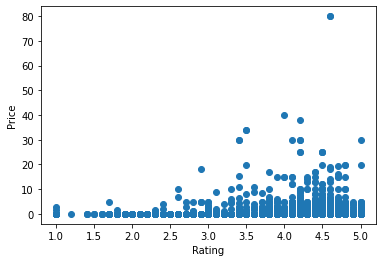

In [840]:
plt.scatter(app_data['Rating'], app_data['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')

Text(0, 0.5, 'Size')

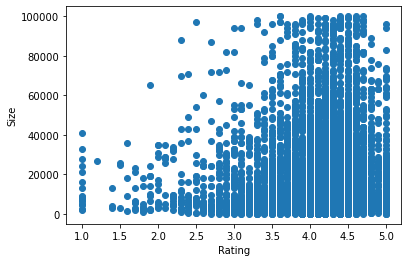

In [841]:
plt.scatter(app_data['Rating'], app_data['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')

Text(0, 0.5, 'Reviews')

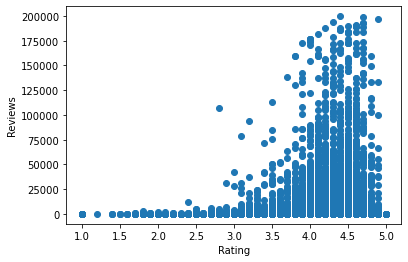

In [842]:
plt.scatter(app_data['Rating'], app_data['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')

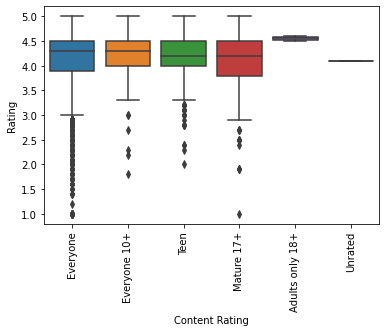

In [843]:
import seaborn as sns

sns.boxplot(x=app_data['Content Rating'],y=app_data['Rating'])
plt.xticks(rotation=90);

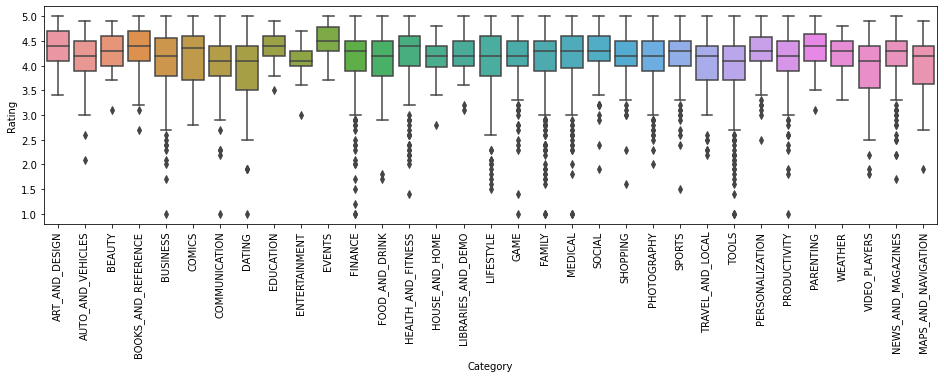

In [844]:
plt.figure(figsize=(16,4))
sns.boxplot(x=app_data['Category'],y=app_data['Rating'])
plt.xticks(rotation=90);

<AxesSubplot:>

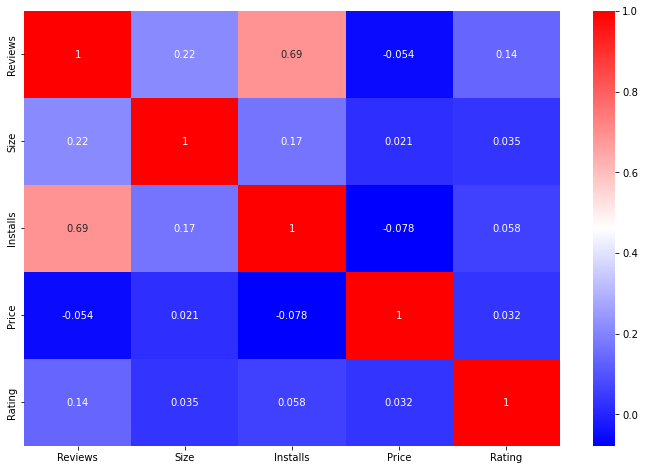

In [845]:
corr_data=app_data[['Reviews','Size','Installs','Price','Rating']]
plt.figure(figsize=(12,8))
sns.heatmap(corr_data.corr(), cmap='bwr', annot=True)

In [846]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [847]:
inp1=app_data
inp1['Reviews'] = np.log(inp1.Reviews)
inp1['Installs'] = np.log(inp1.Installs)
inp1=inp1.drop(['App', 'Last Updated','Current Ver','Android Ver'], axis=1)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210340,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122363,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379508,8700.0,15.424948,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.874198,2800.0,11.512925,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.117994,5600.0,10.819778,Free,0.0,Everyone,Art & Design


In [848]:
inp2=inp1


In [849]:
dummy = ['Content Rating', 'Type', 'Category', 'Genres']
inp2 = pd.get_dummies(inp2, prefix=dummy, columns=dummy, drop_first=True)
inp2.head()

,Rating,Reviews,Size,Installs,Price,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,...,Genres_Health & Fitness;Action & Adventure,Genres_Health & Fitness;Education,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio;Music & Video,Genres_Music;Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.068904,19000.0,9.210340,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,6.874198,14000.0,13.122363,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379508,8700.0,15.424948,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.3,6.874198,2800.0,11.512925,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.4,5.117994,5600.0,10.819778,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [850]:
from sklearn.model_selection import train_test_split

In [851]:
X = inp2.drop('Rating', axis=1)
y = inp2['Rating']

In [852]:
X.head()

,Reviews,Size,Installs,Price,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,...,Genres_Health & Fitness;Action & Adventure,Genres_Health & Fitness;Education,Genres_House & Home,Genres_Libraries & Demo,Genres_Lifestyle,Genres_Maps & Navigation,Genres_Medical,Genres_Music,Genres_Music & Audio;Music & Video,Genres_Music;Music & Video,Genres_News & Magazines,Genres_Parenting,Genres_Parenting;Brain Games,Genres_Parenting;Education,Genres_Parenting;Music & Video,Genres_Personalization,Genres_Photography,Genres_Productivity,Genres_Puzzle,Genres_Puzzle;Action & Adventure,Genres_Puzzle;Brain Games,Genres_Puzzle;Creativity,Genres_Puzzle;Education,Genres_Racing,Genres_Racing;Action & Adventure,Genres_Racing;Pretend Play,Genres_Role Playing,Genres_Role Playing;Action & Adventure,Genres_Role Playing;Pretend Play,Genres_Shopping,Genres_Simulation,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Simulation;Pretend Play,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Strategy;Action & Adventure,Genres_Strategy;Creativity,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,5.068904,19000.0,9.210340,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6.874198,14000.0,13.122363,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11.379508,8700.0,15.424948,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.874198,2800.0,11.512925,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.117994,5600.0,10.819778,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [853]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.3
4    4.4
Name: Rating, dtype: float64

In [854]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3)

In [855]:
X.shape, y.shape

((6406, 149), (6406,))

In [856]:
train_X.shape, test_X.shape

((4484, 149), (1922, 149))

In [857]:
train_y.shape, test_y.shape

((4484,), (1922,))

In [858]:
from sklearn.linear_model import LinearRegression

In [859]:
lr = LinearRegression()

In [860]:
lr.fit(train_X, train_y)

LinearRegression()

In [861]:
lr.predict(test_X)

array([4.29239068, 4.04119986, 4.50560587, ..., 3.83038107, 3.95731695,
       4.26836048])

In [862]:
test_y.values

array([4.6, 3.9, 4.5, ..., 3.6, 3.7, 4.6])

In [863]:
lr.score(test_X, test_y)

0.12813455897097026

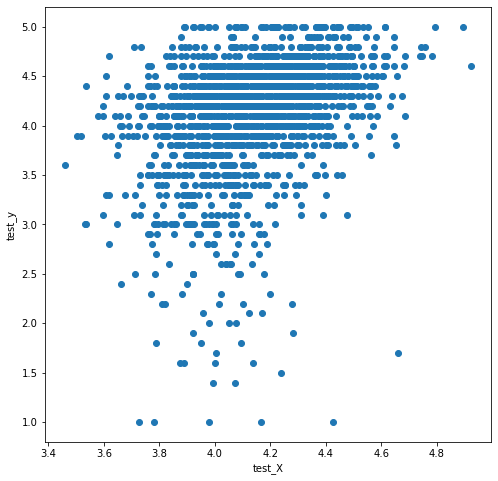

In [864]:
plt.figure(figsize=(8,8))
plt.scatter(lr.predict(test_X), test_y)
plt.xlabel('test_X')
plt.ylabel('test_y');

In [865]:
corr_data=inp2[['Reviews','Size','Installs','Price']]

In [866]:
corr_data.head()

,Reviews,Size,Installs,Price
0,5.068904,19000.0,9.210340,0.0
1,6.874198,14000.0,13.122363,0.0
2,11.379508,8700.0,15.424948,0.0
3,6.874198,2800.0,11.512925,0.0
4,5.117994,5600.0,10.819778,0.0


In [867]:
corr_data.corr()

,Reviews,Size,Installs,Price
Reviews,1.000000,0.258727,0.935282,-0.075959
Size,0.258727,1.000000,0.224769,0.021207
Installs,0.935282,0.224769,1.000000,-0.142440
Price,-0.075959,0.021207,-0.142440,1.000000


<AxesSubplot:>

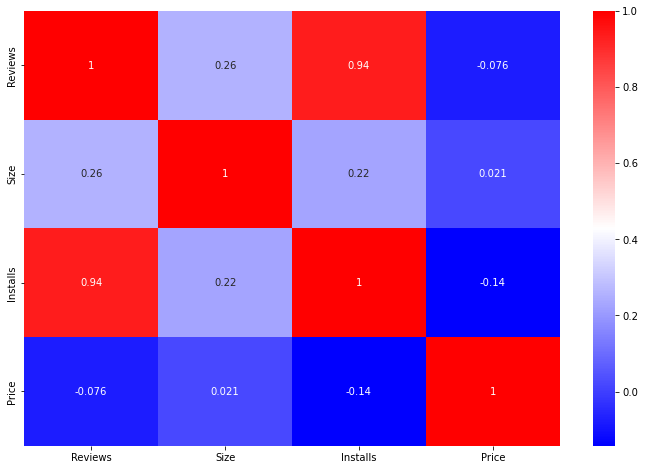

In [868]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_data.corr(), cmap='bwr', annot=True)